In [1]:
import pandas as pd
df=pd.read_csv('/content/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [3]:
df=df[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']]

In [4]:
#view first six rows of data
df[0:6]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
x=df[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution']]
y=df['Proline']

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
x_reduced = pca.fit_transform(scale(x))

In [7]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse = []

In [8]:
# Calculate MSE with only the intercept
from sklearn import model_selection
import numpy as np
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(x_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)

In [9]:
# Calculate MSE using cross-validation, adding one component at a time
from sklearn.metrics import mean_squared_error
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               x_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)


Text(0.5, 1.0, 'Proline')

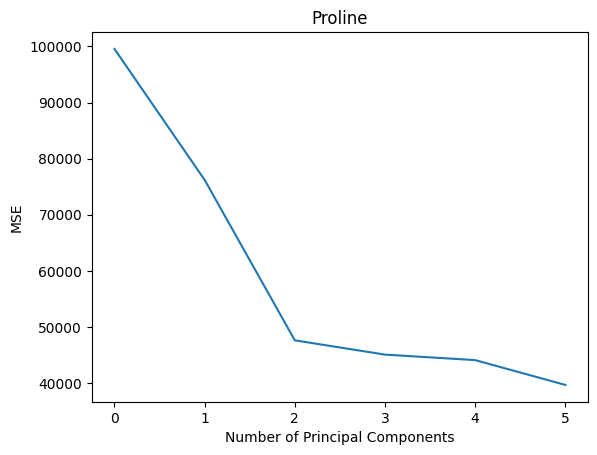

In [10]:
# Plot cross-validation results
import matplotlib.pyplot as plt
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Proline')

In [11]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 36.63,  54.76,  66.59,  73.99,  80.79,  86.06,  90.63,  93.52,
        95.68,  97.73,  99.14, 100.  ])

In [12]:
from sklearn.model_selection import train_test_split
#split the dataset into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
#scale the training and testing data
x_reduced_train = pca.fit_transform(scale(x_train))
x_reduced_test = pca.transform(scale(x_test))[:,:1]

In [14]:
#train PCR model on training data
regr = LinearRegression()
regr.fit(x_reduced_train[:,:1], y_train)

LinearRegression()

In [15]:
#calculate RMSE
pred = regr.predict(x_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

310.8540170893279

We can see that the test RMSE turns out to be 310 This is the average deviation between the predicted value for proline and the observed value for proline for the observations in the testing set.

In [16]:
df['cluster']=y
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,840


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

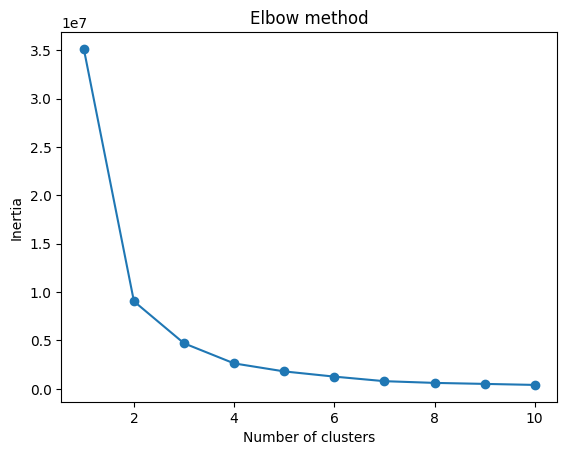

In [18]:
from sklearn.cluster import KMeans
inertias=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i)
  y=kmeans.fit_predict(df)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

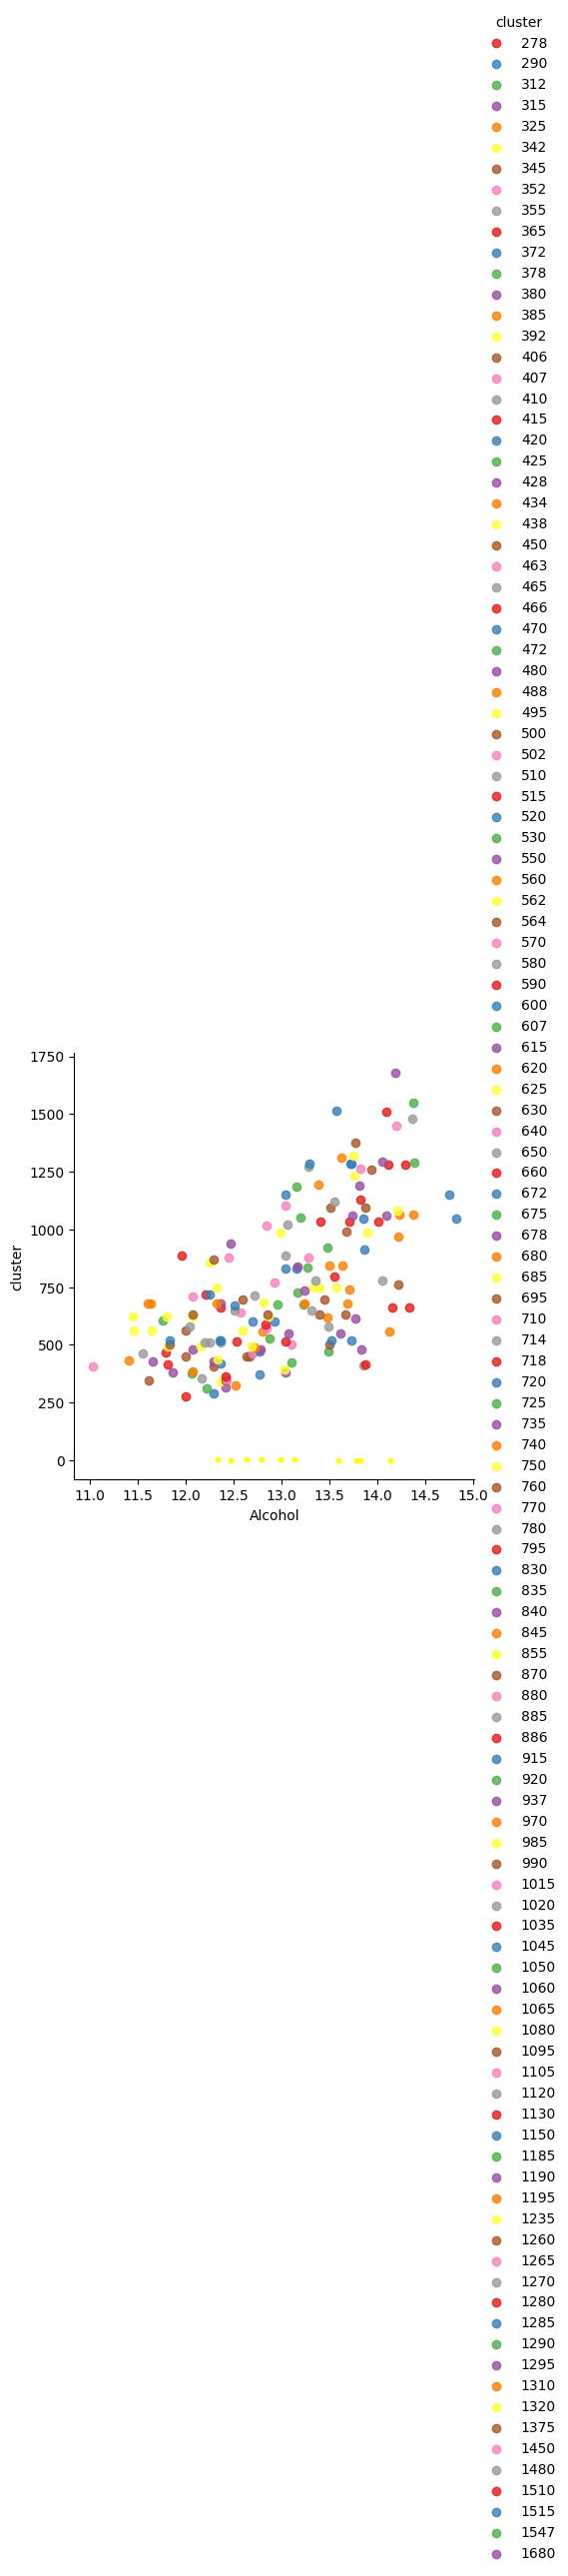

In [21]:
import seaborn as sns
sns.lmplot(data=df,x='Alcohol',y='cluster',fit_reg=False,hue='cluster',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10,c='yellow')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       3, 3, 1, 1, 0, 0, 1, 3, 0, 0, 3, 0, 3, 1, 1, 3, 3, 1, 1, 3, 3, 4,
       1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 1, 4, 2, 4, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 1, 2, 4, 4, 4, 1, 2, 4, 1, 1, 2, 4, 4, 4, 2, 2, 2, 4,
       4, 1, 2, 1, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 1, 1, 1,
       1, 4])

In [24]:
# Reduce the dimensionality of data to 2 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['p1','p2']

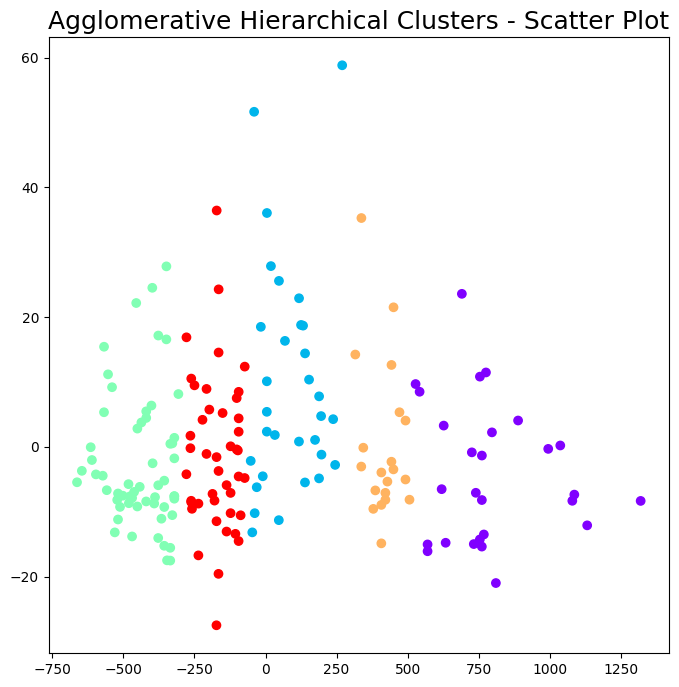

In [25]:
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['p1'],df_pca['p2'],c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()